In [1]:
import datetime as datetime
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt

#Permite ver los graficos sin colocar plt.show
%matplotlib inline 

plt.style.use('default')
#plt.rcParams['figure.figsize'] = (15, 5)


#Funcion para calcular distancias entre coordenadas (lat, lon)
from math import sin,cos,sqrt,asin,pi

#Formula del Harvesine sacada de
#https://joseguerreroa.wordpress.com/2012/11/13/distancia-entre-dos-puntos-de-la-superficie-terrestre-mediante-la-formula-de-haversine-con-python/
#coord = (lat, long)
def distancia(coord1, coord2):
    rTierra = 6374000 #metros
    c = pi/180 #para pasar a raddianes
    d = 2*rTierra*asin(sqrt(sin(c*(coord2[0]-coord1[0])/2)**2 + cos(c*coord1[0])*cos(c*coord2[0])*sin(c*(coord2[1]-coord1[1])/2)**2))
    return d

#reg = created_on, place_name, lat, lon, price_usd_per_m2
def distanciaANuevasEstaciones(reg):
    created_on, place_name, lat, lon, price_usd_per_m2 = reg
    geoPos = lat, lon
    #Ubicacion de las estaciones
    Cordoba = (-34.598691, -58.403841) #Inicio Obras: 17 ene 2012 - Inauguracion: 18 dic 2015
    SantaFe = (-34.594848, -58.402517) #Inicio Obras: 17 ene 2012 - Inauguracion: 12 jul 2016
    LasHeras = (-34.587879, -58.397970) #Inicio Obras: 17 ene 2012 - Inauguracion: 18 dic 2015

    distACordoba = distancia(geoPos, Cordoba)
    distASantaFe = distancia(geoPos, SantaFe)
    distALasHeras = distancia(geoPos, LasHeras)
    

    return min(distACordoba, distASantaFe, distALasHeras)

data17 = pd.read_csv("properati-AR-2017-08-01-properties-sell.csv", low_memory = False)
data16 = pd.read_csv("properati-AR-2016-12-01-properties-sell.csv", low_memory = False)
data15 = pd.read_csv("properati-AR-2015-12-01-properties-sell.csv", low_memory = False)
data14 = pd.read_csv("properati-AR-2015-12-01-properties-sell.csv", low_memory = False)
frames = [data14, data15, data16, data17]
data = pd.concat(frames)
data.head()

,country_name,created_on,currency,description,expenses,extra,floor,geonames_id,id,image_thumbnail,...,price_aprox_usd,price_per_m2,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_total_in_m2,title
0,NaN,2012-08-08,NaN,Excelente depto. en planta alta con patio y co...,NaN,"{""images"":[""http://www.amaira.com.ar/buscador/...",NaN,3433778.0,NaN,http://thumbs3.properati.com/2/hrxzmGbOVe0AAWf...,...,NaN,NaN,NaN,http://general-san-martin-bs-as-g-b-a-zona-nor...,apartment,3.0,NaN,NaN,NaN,DEPARTAMENTO EN VENTA
1,NaN,2012-08-08,NaN,Venta chalet 4 ambientes en Villa Ballester e...,NaN,"{""images"":[""http://www.amaira.com.ar/buscador/...",NaN,3427467.0,NaN,http://thumbs3.properati.com/5/a4W8KzDBTc_SzTL...,...,NaN,NaN,NaN,http://villa-ballester.properati.com.ar/be_ven...,house,5.0,NaN,480.0,480.0,CASA EN VENTA
2,NaN,2012-09-19,USD,CASA CON LOCAL EN VENTA EN PADUA. 2 DORMITORI...,NaN,"{""images"":[""http://www.amaira.com.ar/buscador/...",NaN,3429244.0,NaN,http://thumbs3.properati.com/3/4WSbwKA0arL7bbQ...,...,120000.0,1290.322581,360.36036,http://san-antonio-de-padua.properati.com.ar/u...,house,NaN,NaN,93.0,333.0,CASA EN VENTA
3,NaN,2012-10-10,USD,"2 AMBIENTES, VENTA, VILLA CRESPO CON RENTA....",50,"{""apto_profesional"":true,""images"":[""http://www...",1.0,3427458.0,NaN,http://thumbs3.properati.com/4/hqn-p5RqpJu7eVj...,...,76500.0,1912.500000,1912.50000,http://villa-crespo.properati.com.ar/13tz_vent...,apartment,2.0,NaN,40.0,40.0,DEPARTAMENTO EN VENTA
4,NaN,2012-10-10,USD,"CASA, VENTA, VILLA CRESPO ""EXCELENTE CASA E...",NaN,"{""baulera"":true,""dependencia"":true,""apto_profe...",NaN,3430234.0,NaN,http://thumbs3.properati.com/6/szVEIqerNvrkp-o...,...,570000.0,1727.272727,1425.00000,http://palermo.properati.com.ar/13v3_venta_dep...,apartment,5.0,NaN,330.0,400.0,DEPARTAMENTO EN VENTA


In [2]:
data.drop_duplicates(subset=['lat', 'lon', 'price_usd_per_m2'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493527 entries, 0 to 187481
Data columns (total 28 columns):
country_name                  245641 non-null object
created_on                    493527 non-null object
currency                      410945 non-null object
description                   493510 non-null object
expenses                      33353 non-null object
extra                         247886 non-null object
floor                         56681 non-null float64
geonames_id                   419545 non-null float64
id                            245641 non-null object
image_thumbnail               486477 non-null object
lat                           371658 non-null float64
lat-lon                       371658 non-null object
lon                           371652 non-null float64
operation                     493527 non-null object
place_name                    493463 non-null object
place_with_parent_names       493527 non-null object
price                         413289 no

In [2]:
#Solo me quedo con CAP FED y GBA
dataCapGba = data.loc[(data.state_name.str.contains('Capital Federal') | data.state_name.str.contains('G.B.A') ), ['created_on','operation', 'property_type', 'state_name', 'place_name', 'lat', 'lon', 'price', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor', 'rooms', 'expenses', 'description']]

In [3]:
dataCapGbaMenoresA10K = dataCapGba.loc[dataCapGba['price_usd_per_m2'] < 10000,:]
dataCapGbamayoresA1000 = dataCapGbaMenoresA10K.loc[dataCapGbaMenoresA10K['price_usd_per_m2'] > 1000,:]
dataCapGbamayoresA1000.sort_values('price_usd_per_m2', ascending = False)

,created_on,operation,property_type,state_name,place_name,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description
97079,2017-05-09,sell,house,Capital Federal,Palermo,-34.578327,-58.400505,2990000.0,300.0,380.0,9966.666667,7868.421053,NaN,NaN,NaN,"Casa en excelente estado, reciclada, gran Livi..."
92241,2017-04-28,sell,apartment,Capital Federal,Boedo,NaN,NaN,347850.0,35.0,35.0,9938.571429,9938.571429,NaN,1.0,NaN,fac025- Monoambiente en el contrafrente a part...
96840,2017-05-09,sell,apartment,Capital Federal,Puerto Madero,-34.611493,-58.360985,1600000.0,161.0,161.0,9937.888199,9937.888199,NaN,NaN,NaN,ALVEAR TOWER. Espectacular departamento en el ...
247,2013-05-24,sell,apartment,Bs.As. G.B.A. Zona Norte,Pilar,-34.452738,-58.915705,347200.0,35.0,31.0,9920.000000,11200.000000,NaN,1.0,NaN,HERMOSO MONOAMBIENTE CON BALCON AL FRENTE A ES...
121426,2017-07-04,sell,house,Bs.As. G.B.A. Zona Norte,Acassuso,-34.472209,-58.499679,9900000.0,1000.0,1000.0,9900.000000,9900.000000,NaN,NaN,NaN,Casa importante en lote privilegiado con vista...
86357,2017-04-12,sell,house,Bs.As. G.B.A. Zona Norte,Tigre,NaN,NaN,198000.0,20.0,120.0,9900.000000,1650.000000,NaN,NaN,NaN,Muy lindo triplex a estrenar de en el complejo...
91033,2017-04-28,sell,apartment,Bs.As. G.B.A. Zona Norte,Bs.As. G.B.A. Zona Norte,NaN,NaN,395000.0,40.0,40.0,9875.000000,9875.000000,NaN,1.0,NaN,"Departamento Nuevo, 2 amb al frente en 1 Piso...."
54741,2016-12-01,sell,apartment,Capital Federal,Palermo Chico,-34.576562,-58.404856,2100000.0,213.0,205.0,9859.154930,10243.902439,NaN,4.0,NaN,Le Parc Figueroa Alcorta es la síntesis perfec...
32588,2016-12-01,sell,apartment,Capital Federal,Palermo Chico,-34.576562,-58.404856,2100000.0,213.0,205.0,9859.154930,10243.902439,NaN,4.0,NaN,Le Parc Figueroa Alcorta es la síntesis perfec...
106661,2017-05-31,sell,apartment,Capital Federal,Palermo,-34.577818,-58.406038,2490000.0,254.0,220.0,9803.149606,11318.181818,NaN,NaN,NaN,CODIGO: 617-1112 ubicado en: Jeronimo Salguero...


In [4]:
dataCapGbaSupmayor5 = dataCapGbamayoresA1000.loc[dataCapGbamayoresA1000['surface_total_in_m2'] > 5, :]
dataCapGbaSupmayor5.loc[:, "year"] = dataCapGbaSupmayor5.apply(lambda x: x["created_on"].partition("-")[0], axis = 1)

## Veamos el precio del m2 en recoleta por año

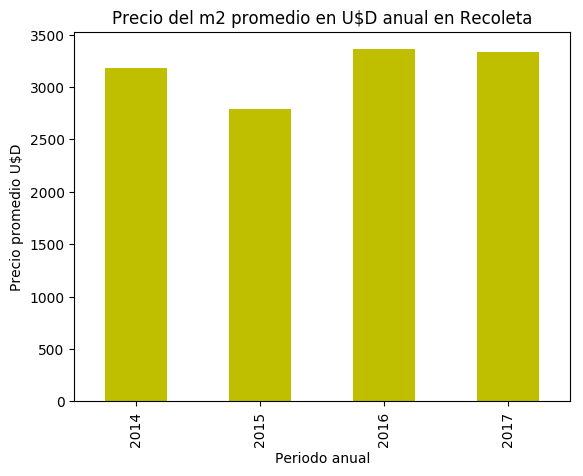

In [33]:
propiedadesEnRecoleta = dataCapGbaSupmayor5.dropna(subset=['place_name'])
propiedadesEnRecoleta = propiedadesEnRecoleta.loc[propiedadesEnRecoleta.place_name.str.contains('Recoleta'), ['created_on', 'price_usd_per_m2', 'property_type', 'year']]
propiedadesEnRecoleta.loc[:, "yearmonth"] = propiedadesEnRecoleta.apply(lambda x: x["created_on"].partition("-")[0] + "-" + (x["created_on"].partition("-")[2]).partition("-")[0], axis = 1)
recoletaPorMes = propiedadesEnRecoleta.groupby('year').agg([np.size, np.mean])
recoletaPorMes = recoletaPorMes.loc[recoletaPorMes['price_usd_per_m2']['size'] > 5.0, :]
graficoRecoleta = recoletaPorMes['price_usd_per_m2']['mean'].plot(kind ='bar', color='y', legend=False, title="Precio del m2 promedio en U$D anual en Recoleta")
graficoRecoleta.set_xlabel("Periodo anual")
graficoRecoleta.set_ylabel("Precio promedio U$D")

# Se puede ver una suba de precios de 2015 a 2016. Esto puede ser por la cercania de las propiedades a las nuevas estaciones del subte H. Veamoslo

## Precio por m2 en relacion a la cercania al Subte H y al año de su inauguracion
### Tomando propiedades con distancia 400mts

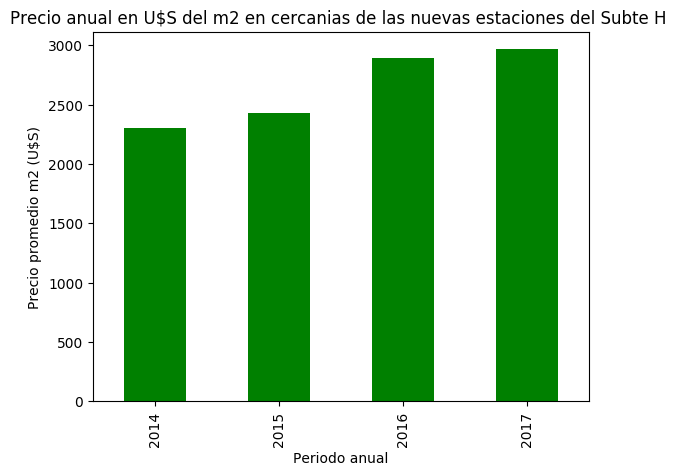

In [55]:
cercanasANuevasEstaciones = dataCapGbaSupmayor5.loc[dataCapGbaSupmayor5.lat.notnull() & dataCapGbaSupmayor5.lon.notnull(), ['year', 'place_name', 'lat', 'lon', 'price_usd_per_m2']]
cercanasANuevasEstaciones.loc[:, 'distanciaAEstacion'] = cercanasANuevasEstaciones.apply(distanciaANuevasEstaciones, axis = 1)
#Solo dejo las propiedades que estan a menos de 400mts
cercanasANuevasEstaciones = cercanasANuevasEstaciones.loc[cercanasANuevasEstaciones["distanciaAEstacion"] < 400, :]

cercanasGrafico = cercanasANuevasEstaciones.drop('lat', axis=1).drop('lon', axis=1).drop('place_name', axis=1).drop('distanciaAEstacion', axis=1)
grafico1 = cercanasGrafico.groupby('year').agg(np.mean).plot(kind ='bar', color='g', legend=False, title="Precio anual en U$S del m2 en cercanias de las nuevas estaciones del Subte H ")
grafico1.set_xlabel("Periodo anual")
grafico1.set_ylabel("Precio promedio m2 (U$S)")

# Viendo que pasa en Villa Urquiza en los ultimos 2 años

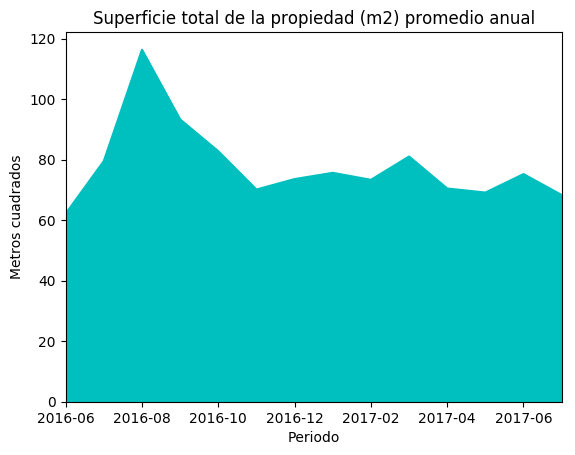

In [67]:
propVillaUrquiza = dataCapGbaSupmayor5.dropna(subset=['place_name'])
propVillaUrquiza.loc[:, "yearmonth"] = propVillaUrquiza.apply(lambda x: x["created_on"].partition("-")[0] + "-" + (x["created_on"].partition("-")[2]).partition("-")[0], axis = 1)
propVillaUrquiza20172016 = propVillaUrquiza.loc[propVillaUrquiza.place_name.str.contains('Villa Urquiza') & (propVillaUrquiza.yearmonth.str.contains('2017') | propVillaUrquiza.yearmonth.str.contains('2016')), ['yearmonth', 'property_type', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2']]
#Filtro los que tengan pocos registros (menos de 15)
propVillaUrquiza20172016.loc[: ,'cant'] = 1

#Agrego columna: porcentaje cubierto y tomo las que tienen menor o igual cubierta que total
#propVillaUrquiza20172016.loc[propVillaUrquiza20172016['surface_covered_in_m2']/propVillaUrquiza20172016['surface_total_in_m2'] <= 1.0, 'sup_percentage_covered'] = propVillaUrquiza20172016['surface_covered_in_m2']/propVillaUrquiza20172016['surface_total_in_m2']

propVillaUrquiza20172016grouped = propVillaUrquiza20172016.groupby('yearmonth').agg([np.size, np.mean])
#Solo tomo los que tengan mas de 10 casas
propVillaUrquiza20172016grouped = propVillaUrquiza20172016grouped.loc[propVillaUrquiza20172016grouped['cant']['size'] > 10, :]
propVillaUrquiza20172016grouped

#Superficie total de las publicaciones (fue bajando a lo largo de los ultimos meses)
propVillaUrquizaSupTotalPromedio = propVillaUrquiza20172016grouped.loc[:, ['yearmonth', 'surface_total_in_m2']]
dibujoVUm2 = propVillaUrquizaSupTotalPromedio['surface_total_in_m2']['mean'].plot(kind='area', color='c', title='Superficie total de la propiedad (m2) promedio anual')
dibujoVUm2.set_xlabel("Periodo")
dibujoVUm2.set_ylabel("Metros cuadrados")
#Porcentaje cubierto promedio
#propVillaUrquizaPorcentajeCubierto = propVillaUrquiza20172016.loc[:, ['yearmonth', 'sup_percentage_covered']]
#propVillaUrquizaPorcentajeCubierto

## Vemos que el promedio de la superficie cubierta para las propiedades publicadas fue bajando y esta causa puede ser la expansion del barrio, el cual crecio "para arriba", construyendose muchos edificios. Esto lo podemos comprobar facilmente:

In [68]:
propVillaUrquiza20172016['property_type'].value_counts()

apartment    1465
PH            110
house          62
store          27
Name: property_type, dtype: int64

#### Aca se ve como se vendieron muchos mas departamentos que otro tipo de propiedad durante estos ultimos dos años.

## Separando por zonas GBA Norte/Sur/Oeste y Capital Federal

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000005EF696A0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000005FB5A400>], dtype=object)

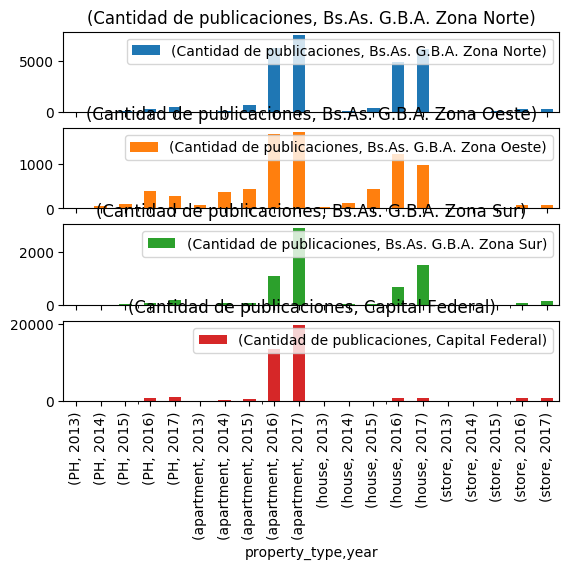

In [66]:
publicaciones = dataCapGbaSupmayor5.loc[:, ['state_name', 'property_type', 'year', 'price_usd_per_m2']].groupby(['state_name', 'property_type', 'year']).count()
publicacionesCapFed = dataCapGbaSupmayor5.loc[dataCapGbaSupmayor5['state_name'].str.contains('Capital Federal'), ['property_type', 'year', 'price_usd_per_m2']].groupby(['property_type', 'year']).count()
publicacionesGBANorte = dataCapGbaSupmayor5.loc[dataCapGbaSupmayor5['state_name'].str.contains('Bs.As. G.B.A. Zona Norte'), ['property_type', 'year', 'price_usd_per_m2']].groupby(['property_type', 'year']).count()
publicacionesGBASur = dataCapGbaSupmayor5.loc[dataCapGbaSupmayor5['state_name'].str.contains('Bs.As. G.B.A. Zona Sur'), ['property_type', 'year', 'price_usd_per_m2']].groupby(['property_type', 'year']).count()
publicacionesGBAOeste = dataCapGbaSupmayor5.loc[dataCapGbaSupmayor5['state_name'].str.contains('Bs.As. G.B.A. Zona Oeste'), ['property_type', 'year', 'price_usd_per_m2']].groupby(['property_type', 'year']).count()

publicaciones = publicaciones.rename(columns = {'price_usd_per_m2': 'Cantidad de publicaciones'})
publicaciones.unstack(level=0).plot(kind='bar', subplots=True)

In [25]:
##Agrupando por barrio de CABA y año y tomando unicamente los que tengan mas de 10 publicaciones por año
CABAPorBarrioYAnio = dataCapGbaSupmayor5.loc[dataCapGbaSupmayor5.state_name.str.contains('Capital Federal'), :]
CABAPorBarrioYAnio.loc[:, "year"] = CABAPorBarrioYAnio.apply(lambda x: x["created_on"].partition("-")[0], axis = 1)
CABAPorBarrioYAnio = CABAPorBarrioYAnio.loc[:, ["year", "place_name", "price_usd_per_m2"]]
CABAPorBarrioYAnio = CABAPorBarrioYAnio.groupby(["place_name", "year"]).agg([np.mean, np.size])
CABAPorBarrioYAnio = CABAPorBarrioYAnio.loc[CABAPorBarrioYAnio['price_usd_per_m2']['size'] > 10, :]
#CABAPorBarrioYAnio.loc[CABAPorBarrioYAnio['price_usd_per_m2']>=CABAPorBarrioYAnio.groupby(['place_name','year']).transform(np.mean)['price_usd_per_m2'],]
CABAPorBarrioYAnio

price_usd_per_m2        
                                     mean    size
place_name          year                         
Abasto              2016      2044.499113    42.0
                    2017      2119.452961    83.0
Agronomía           2016      2162.766473    56.0
                    2017      2139.282478    24.0
Almagro             2014      1801.717737    21.0
                    2015      2266.894082    76.0
                    2016      2113.773003   643.0
                    2017      2228.842669   848.0
Balvanera           2014      1776.271874    22.0
                    2015      1657.254069    15.0
                    2016      1843.080828   483.0
                    2017      1955.709567   474.0
Barracas            2015      1844.998535    12.0
                    2016      1856.342263   284.0
                    2017      1991.897913   329.0
Barrio Norte        2014      2308.834111    17.0
                    2015      2296.562086    23.0
                    2016      2872.548598   777.0
                    2017      3040.962998   936.0
Belgrano            2014      2740.470687    52.0
                    2015      2708.278120    64.0
                    2016      3235.180081  1271.0
                    2017      3126.336773  2200.0
Boca                2016      1553.117467    86.0
                    2017      1712.830470   149.0
Boedo               2015      1668.117070    43.0
                    2016      1763.820227   224.0
                    2017      2600.923968   431.0
Caballito           2015      2027.467179    30.0
                    2016      2354.410076  1022.0
...                                   ...     ...
Velez Sarsfield     2017      1735.604911    22.0
Versalles           2016      1712.840495    26.0
                    2017      1599.685371    24.0
Villa Crespo        2014      3376.053995    15.0
                    2015      2538.953034    39.0
                    2016      2466.350272   805.0
                    2017      2516.723186  1076.0
Villa Devoto        2016      2157.017862   208.0
                    2017      2157.052897   264.0
Villa General Mitre 2016      1829.717064    30.0
                    2017      1886.599674    37.0
Villa Lugano        2016      1428.680156    48.0
                    2017      1458.199647    78.0
Villa Luro          2015      1902.771916    13.0
                    2016      1796.976453   128.0
                    2017      2077.737122   296.0
Villa Ortuzar       2016      2233.904577    63.0
                    2017      2358.035158    77.0
Villa Pueyrredón    2016      1870.531863    92.0
                    2017      2169.186792   114.0
Villa Real          2016      1834.161662    20.0
                    2017      1549.883948    24.0
Villa Santa Rita    2016      1818.126908    44.0
                    2017      1862.924460    28.0
Villa Urquiza       2014      1839.871215    15.0
                    2015      2211.276258    20.0
                    2016      2515.749901   554.0
                    2017      2480.803994  1110.0
Villa del Parque    2016      1991.021354   184.0
                    2017      2282.759303   339.0

[160 rows x 2 columns]

TypeError: unsupported operand type(s) for -: 'tuple' and 'float'

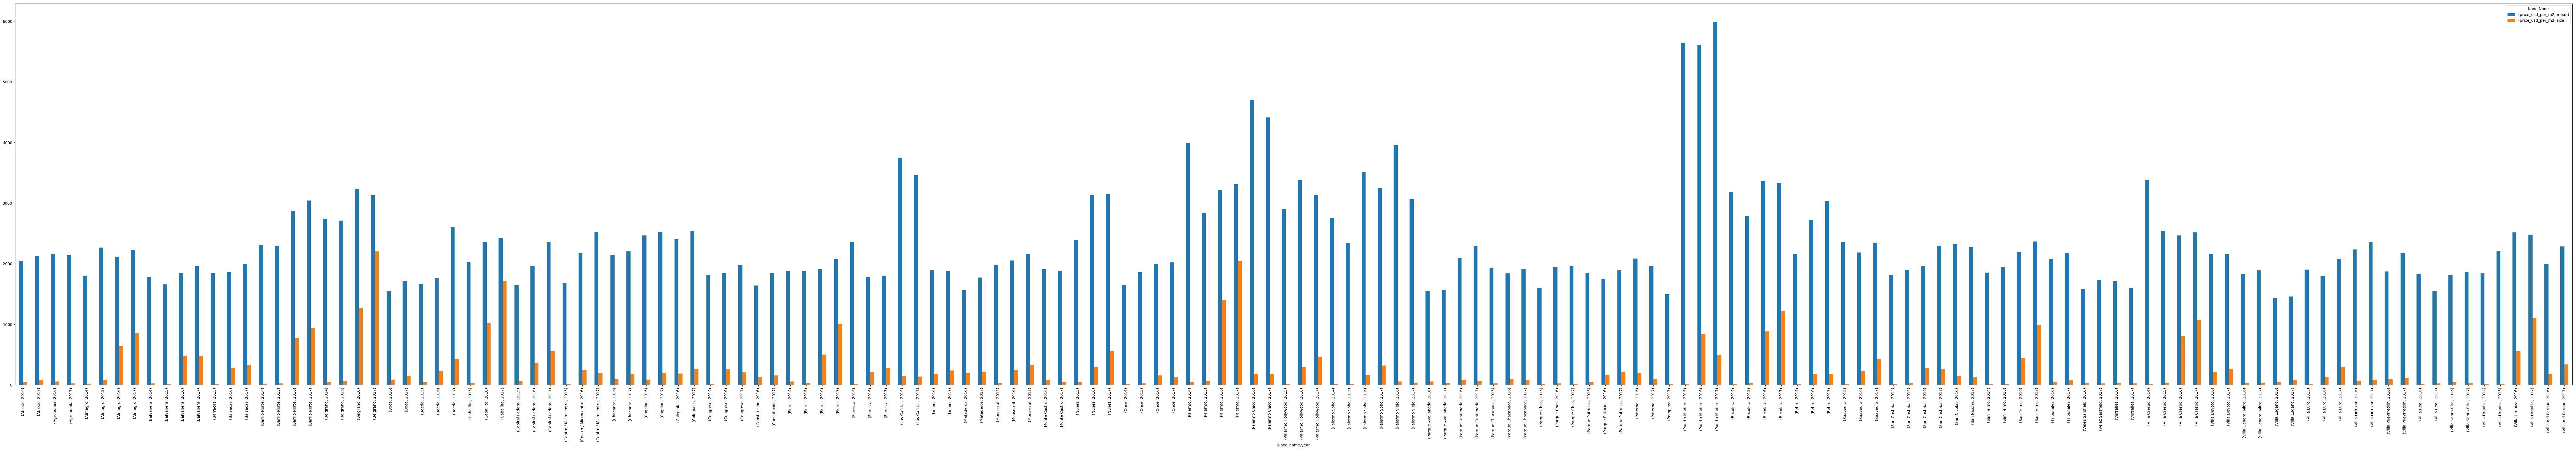

In [30]:
CABAPorBarrioYAnio.plot(kind='bar', figsize=(120,18))
plt.bar(CABAPorBarrioYAnio.index.values, CABAPorBarrioYAnio['price_usd_per_m2']['mean'])
plt.suptitle("Precio promedio m2 por barrio y año")
plt.xlabel("Barrio por Año")
plt.ylabel("Precio USD promedio del m2")